In [253]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch
from collections import defaultdict

In [93]:
def shotmap(match_id):
    
    #understat class
    understat = Understat()
    
    # manipulating dataframe
    df = understat.single_match(match_id)
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    df['goal'] = np.where(df['result']=='Goal',1,0)
    df[['X','Y']] = df[['X','Y']]*100
    own = df[df['result']=='OwnGoal']
    df = df[df['result']!='OwnGoal']
    
    # pitch draw
    pitch = Pitch(pad_bottom=0.5,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d')
    
    # plotting figures
    fig, ax = pitch.draw(figsize=(14, 12))
    fig.patch.set_facecolor('#263a4d')

    # creating scatter plots for home & away teams 
    re = pitch.scatter(100-df[(df['h_a']=='h') & (df['result']=='Goal')]['X'],
                       100-df[(df['h_a']=='h') & (df['result']=='Goal')]['Y'],
                       s=(df[(df['h_a']=='h') & (df['result']=='Goal')]['xG']*720)+100,
                       c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal'
                      )

    re1 = pitch.scatter(100-df[(df['h_a']=='h') & (df['result']!='Goal')]['X'],
                        100-df[(df['h_a']=='h') & (df['result']!='Goal')]['Y'],
                        s=(df[(df['h_a']=='h') & (df['result']!='Goal')]['xG']*720)+100,
                        c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed'
                       )

    re2 = pitch.scatter(df[(df['h_a']=='a') & (df['result']=='Goal')]['X'],
                        df[(df['h_a']=='a') & (df['result']=='Goal')]['Y'],
                        s=(df[(df['h_a']=='a') & (df['result']=='Goal')]['xG']*720)+100,
                        c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal'
                       )

    re3 = pitch.scatter(df[(df['h_a']=='a') & (df['result']!='Goal')]['X'],
                        df[(df['h_a']=='a') & (df['result']!='Goal')]['Y'],
                        s=(df[(df['h_a']=='a') & (df['result']!='Goal')]['xG']*720)+100,
                        c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed'
                       )

    re4 = pitch.scatter(own[(own['h_a']=='a') & (own['result']=='OwnGoal')]['X'],
                        own[(own['h_a']=='a') & (own['result']=='OwnGoal')]['Y'],
                        s=(own[(own['h_a']=='a') & (own['result']=='OwnGoal')]['xG']*720)+100,
                        c='#9e443e',marker='h',edgecolors='#383838',ax=ax
                       )

    re5 = pitch.scatter(100-own[(own['h_a']=='h') & (own['result']=='OwnGoal')]['X'],
                        100-own[(own['h_a']=='h') & (own['result']=='OwnGoal')]['Y'],
                        s=(own[(own['h_a']=='h') & (own['result']=='OwnGoal')]['xG']*720)+100,
                        c='#9e443e',marker='h',edgecolors='#383838',ax=ax
                       )

    # adding legends depends on goal or own goal
    if len(own)!=0:
        colors = ['#9e443e','#808080','#c9897b']
        for y,c in zip(np.arange(5, 20, 5).tolist(),colors):
            plt.scatter(90,y,s=300,color=c,marker='h')
   
        xx = np.arange(93, 96, 1).tolist()[::-1]
        yy = np.arange(5, 20, 5).tolist()
        xx_yy = ['Own Goal', 'Missed', 'Goal']
        for i in range(len(xx)):
            plt.text(xx[i], yy[i], xx_yy[i], fontsize=12, color="white",ha="center", va="center",fontweight='bold')
    
    else:
        colors = ['#808080','#c9897b']
        for y,c in zip(np.arange(10, 20, 5).tolist(),colors):
            plt.scatter(90,y,s=300,color=c,marker='h')
        
        xx = np.arange(93, 95, 1).tolist()
        yy = np.arange(10, 20, 5).tolist()[::-1]
        xx_yy = ['Goal', 'Missed']
        for i in range(len(xx)):
            plt.text(xx[i], yy[i], xx_yy[i], fontsize=12, color="white",ha="center", va="center",fontweight='bold')

    # adding xG sizes
    mSize = [0.10,0.2,0.4,0.6,0.8]
    mSizeS = [720 * i for i in mSize]
    mSizeS = [100 + i for i in mSizeS]

    mx = [3,3,3,3,3]
    my = [1.8,4,6.8,10,13.75]

    plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
    for i in range(len(mx)):
        plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')

    plt.figtext(0.0825,0.25,'xG',fontweight='bold',fontsize=12,color='white')
    
    # adding xG, conversion and xG per Shot circles
    h_xg = sum(df[df['h_a']=='h']['xG'])
    a_xg = sum(df[df['h_a']=='a']['xG'])
    lst_xg = [h_xg,a_xg]

    h_conversion = len(df[(df['result']=='Goal') & (df['h_a']=='h')])/len(df[df['h_a']=='h'])
    a_conversion = len(df[(df['result']=='Goal') & (df['h_a']=='a')])/len(df[df['h_a']=='a'])
    lst_conversion = [h_conversion,a_conversion]

    h_xg_shot = h_xg/len(df[df['h_a']=='h'])
    a_xg_shot = a_xg/len(df[df['h_a']=='a'])
    lst_xg_shot = [h_xg_shot,a_xg_shot]

    for x,xg in zip(np.arange(0.4,0.601,0.2).tolist(),lst_xg):
        plt.text(x, 0.8450, "xG: {:.2f}".format(xg), size=20,
         ha="center", va="center",transform=ax.transAxes,
         color="#ff6361",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ff6361',alpha=0.10)
         )
    
    for x,con in zip(np.arange(0.4,0.601,0.2).tolist(),lst_conversion):
        plt.text(x, 0.6550, "Conversion: {:.2f}".format(con), size=10.5,
         ha="center", va="center",transform=ax.transAxes,
         color="#baffc9",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#baffc9',alpha=0.10)
         )
    
    for x,xg_shot in zip(np.arange(0.4,0.601,0.2).tolist(),lst_xg_shot):
        plt.text(x, 0.4650, "xG per Shot: {:.2f}".format(xg_shot), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#ffffba",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ffffba',alpha=0.10)
         )
        
    # preparing title
    h_goal = len(df[(df['result']=='Goal') &(df['h_a']=='h')]) + len(own[(own['result']=='OwnGoal') & (own['h_a']=='a')])
    a_goal = len(df[(df['result']=='Goal') &(df['h_a']=='a')]) + len(own[(own['result']=='OwnGoal') & (own['h_a']=='h')])
    font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }
    plt.title(df['date'].values[0] + " | " + df['h_team'].values[0] + '-' + df['a_team'].values[0] + ': ' + str(h_goal) + "-"+
          str(a_goal)+ " | " + "Shot Map",fontdict=font,color='white')
    
    # adding figtext
    plt.figtext(0.03,0.85,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
    
    # show the plot
    plt.show()

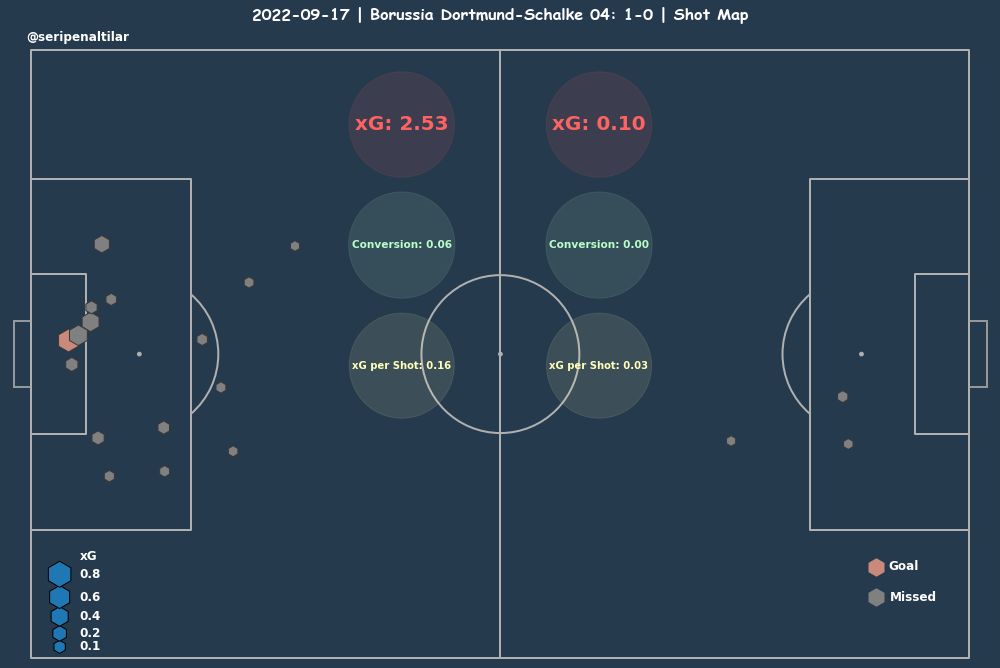

In [155]:
shotmap(19397)

In [370]:
def xg_flow(match_id):
    #understat class
    understat = Understat()
    
    # cleaning data
    df = understat.single_match(match_id)
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    df['minute'] = df['minute'].astype(int)
    df[['X','Y']] = df[['X','Y']]*100
    own = df[df['result']=='OwnGoal']
    own['result'] = np.where(own['result']=='OwnGoal','Goal',own['result'])
    df_h = pd.concat([df[(df['h_a']=='h') & (df['result']!='OwnGoal')],own[own['h_a']=='a']])
    df_a = pd.concat([df[(df['h_a']=='a') & (df['result']!='OwnGoal')],own[own['h_a']=='h']])
    df_h = df_h.sort_values(by='minute')
    df_a = df_a.sort_values(by='minute')
    df_h['xg_cumulative'] = df_h['xG'].cumsum()
    df_a['xg_cumulative'] = df_a['xG'].cumsum()
    
    # preparing lists for step and scatter plot
    h_min = df_h['minute'].tolist()
    h_min.insert(0,0)
    a_min = df_a['minute'].tolist()
    a_min.insert(0,0)
    h_xg = df_h['xg_cumulative'].tolist()
    h_xg.insert(0,0)
    a_xg = df_a['xg_cumulative'].tolist()
    a_xg.insert(0,0)
    
    # creating figure
    fig,ax = plt.subplots(figsize=(16,8))
    
    # step graphs
    ax.step(x=h_min,y=h_xg,c="#fec668",linewidth=4)
    ax.step(x=a_min,y=a_xg,c="#bc5090",linewidth=4)
    
    # customizing graph
    ax.set_facecolor(color='#263a4d')
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)
    ax.spines[['left','bottom','right','top']].set_color('grey')
    fig.patch.set_facecolor('#263a4d')
    
    # scatter plots
    ax.scatter(x=df_h[df_h['result']=='Goal']['minute'],y=df_h[df_h['result']=='Goal']['xg_cumulative'],s=900,
          color='#fec668', edgecolor='black', label=df_h['h_team'].iloc[0],linewidths=1.5)

    ax.scatter(x=df_a[df_a['result']=='Goal']['minute'],y=df_a[df_a['result']=='Goal']['xg_cumulative'],s=900,
          color='#bc5090', edgecolor='black', label=df_a['a_team'].iloc[0],linewidths=1.5)
    
    # legends
    legend = ax.legend(loc="upper center",prop={'weight':'bold'})
    legend.legendHandles[0]._sizes = [1000]
    legend.legendHandles[1]._sizes = [1000]

    # Annotation for players who scored

    #home team
    for i in range(len(df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)])):
        ax.annotate(df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['player'].tolist()[i], 
                 (df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['minute'].tolist()[i]-2.5,
                  df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

    # away team  
    for i in range(len(df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)])):
        ax.annotate(df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['player'].tolist()[i], 
                 (df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['minute'].tolist()[i]-2.5,
                  df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

    # own goal away team
    for i in range(len(df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)])):
        ax.annotate('Own Goal', 
                 (df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)]['minute'].tolist()[i]-2.,
                  df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)
    
    # own goal home team   
    for i in range(len(df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)])):
        ax.annotate('Own Goal', 
                 (df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)]['minute'].tolist()[i]-3,
                  df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

    # Annotations for xGs

    # home team
    for i in range(len(df_h[df_h['result']=='Goal'])):
        plt.annotate(np.round(df_h[df_h['result']=='Goal']['xG'],2).tolist()[i], 
                 (df_h[df_h['result']=='Goal']['minute'].tolist()[i], 
                  df_h[df_h['result']=='Goal']['xg_cumulative'].tolist()[i]),c='white',
                 size=11,ha='center',va='center',fontweight='bold')

    # away team
    for i in range(len(df_a[df_a['result']=='Goal'])):
        plt.annotate(np.round(df_a[df_a['result']=='Goal']['xG'],2).tolist()[i], 
                 (df_a[df_a['result']=='Goal']['minute'].tolist()[i], 
                  df_a[df_a['result']=='Goal']['xg_cumulative'].tolist()[i]),c='white',
                 size=11,ha='center',va='center',fontweight='bold')
    
    # fonts for labels, axis and title
    font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

    plt.xlabel('Minute',fontdict=font)
    plt.ylabel('Expected Goal', fontdict=font)

    plt.vlines( ymin=0, ymax=max(max(df_h['xg_cumulative']),max(df_a['xg_cumulative']))+0.5,x=45, alpha = 0.7,color='#c9897b',linestyle="solid")

    plt.xticks([0,15,30,45,60,75,90],c='white',fontsize=16)
    plt.yticks(c='white',fontsize=16)
    plt.margins(y=0)
    plt.title(df_h['h_team'].iloc[0] + ' vs ' + df_a['a_team'].iloc[0] + ' Expected Goal Flow' ,fontdict=font)
    plt.show()

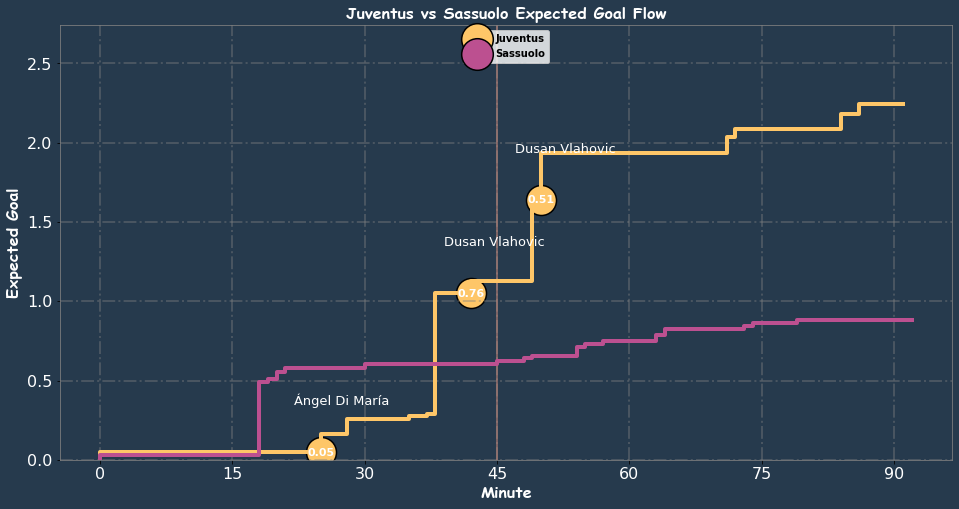

In [371]:
xg_flow(18591)

In [362]:
df = understat.single_match(19397)
df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['minute'] = df['minute'].astype(int)
df[['X','Y']] = df[['X','Y']]*100
own = df[df['result']=='OwnGoal']
own['result'] = np.where(own['result']=='OwnGoal','Goal',own['result'])

In [363]:
df_h = pd.concat([df[(df['h_a']=='h') & (df['result']!='OwnGoal')],own[own['h_a']=='a']])
df_a = pd.concat([df[(df['h_a']=='a') & (df['result']!='OwnGoal')],own[own['h_a']=='h']])

In [364]:
df_h = df_h.sort_values(by='minute')
df_a = df_a.sort_values(by='minute')
df_h['xg_cumulative'] = df_h['xG'].cumsum()
df_a['xg_cumulative'] = df_a['xG'].cumsum()

In [365]:
h_min = df_h['minute'].tolist()
h_min.insert(0,0)
a_min = df_a['minute'].tolist()
a_min.insert(0,0)
h_xg = df_h['xg_cumulative'].tolist()
h_xg.insert(0,0)
a_xg = df_a['xg_cumulative'].tolist()
a_xg.insert(0,0)

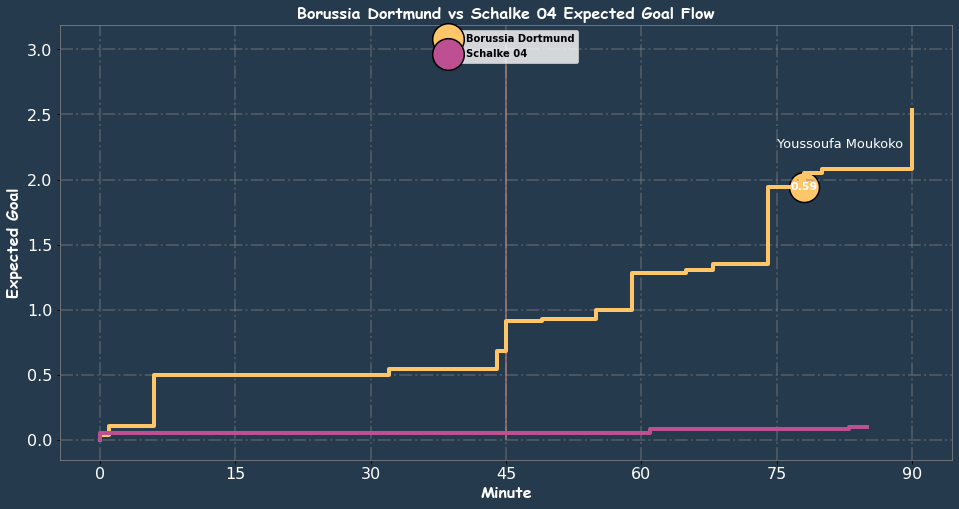

In [372]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=h_min,y=h_xg,c="#fec668",linewidth=4)
ax.step(x=a_min,y=a_xg,c="#bc5090",linewidth=4)

ax.set_facecolor(color='#263a4d')
ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)
ax.spines[['left','bottom','right','top']].set_color('grey')
fig.patch.set_facecolor('#263a4d')

ax.scatter(x=df_h[df_h['result']=='Goal']['minute'],y=df_h[df_h['result']=='Goal']['xg_cumulative'],s=900,
          color='#fec668', edgecolor='black', label=df_h['h_team'].iloc[0],linewidths=1.5)

ax.scatter(x=df_a[df_a['result']=='Goal']['minute'],y=df_a[df_a['result']=='Goal']['xg_cumulative'],s=900,
          color='#bc5090', edgecolor='black', label=df_a['a_team'].iloc[0],linewidths=1.5)

legend = ax.legend(loc="upper center",prop={'weight':'bold'})
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]

# Annotation for Players who scored

#home team
for i in range(len(df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)])):
    ax.annotate(df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['player'].tolist()[i], 
                 (df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['minute'].tolist()[i]-3,
                  df_h[(df_h['result']=='Goal') & (df_h['xG'] != 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

# away team  
for i in range(len(df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)])):
    ax.annotate(df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['player'].tolist()[i], 
                 (df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['minute'].tolist()[i]-3,
                  df_a[(df_a['result']=='Goal') & (df_a['xG'] != 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

# own goal away team
for i in range(len(df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)])):
    ax.annotate('Own Goal', 
                 (df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)]['minute'].tolist()[i]-3,
                  df_a[(df_a['result']=='Goal') & (df_a['xG'] == 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)
    
# own goal home team   
for i in range(len(df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)])):
    ax.annotate('Own Goal', 
                 (df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)]['minute'].tolist()[i]-3,
                  df_h[(df_h['result']=='Goal') & (df_h['xG'] == 0)]['xg_cumulative'].tolist()[i]+0.30),
                c='white',size=13)

# Annotations for xGs

# home team
for i in range(len(df_h[df_h['result']=='Goal'])):
    plt.annotate(np.round(df_h[df_h['result']=='Goal']['xG'],2).tolist()[i], 
                 (df_h[df_h['result']=='Goal']['minute'].tolist()[i], 
                  df_h[df_h['result']=='Goal']['xg_cumulative'].tolist()[i]),c='white',
                 size=11,ha='center',va='center',fontweight='bold')

# away team
for i in range(len(df_a[df_a['result']=='Goal'])):
    plt.annotate(np.round(df_a[df_a['result']=='Goal']['xG'],2).tolist()[i], 
                 (df_a[df_a['result']=='Goal']['minute'].tolist()[i], 
                  df_a[df_a['result']=='Goal']['xg_cumulative'].tolist()[i]),c='white',
                 size=11,ha='center',va='center',fontweight='bold')
    
    
font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Minute',fontdict=font)
plt.ylabel('Expected Goal', fontdict=font)

plt.vlines( ymin=0, ymax=max(max(df_h['xg_cumulative']),max(df_a['xg_cumulative']))+0.5,x=45, alpha = 0.7,color='#c9897b',linestyle="solid")

plt.xticks([0,15,30,45,60,75,90],c='white',fontsize=16)
plt.yticks(c='white',fontsize=16)
plt.title(df_h['h_team'].iloc[0] + ' vs ' + df_a['a_team'].iloc[0] + ' Expected Goal Flow' ,fontdict=font)
plt.show()